In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data
df = pd.read_csv('Bank_Churn.csv')
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [55]:
df.Geography.unique()

array([0, 2, 1])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

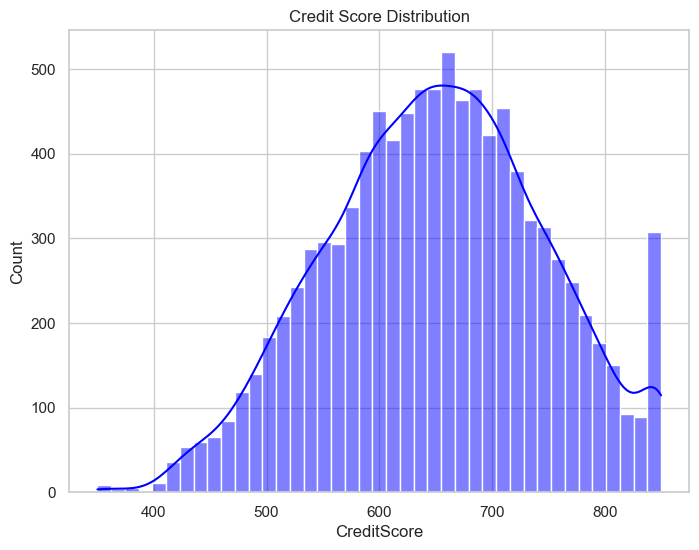

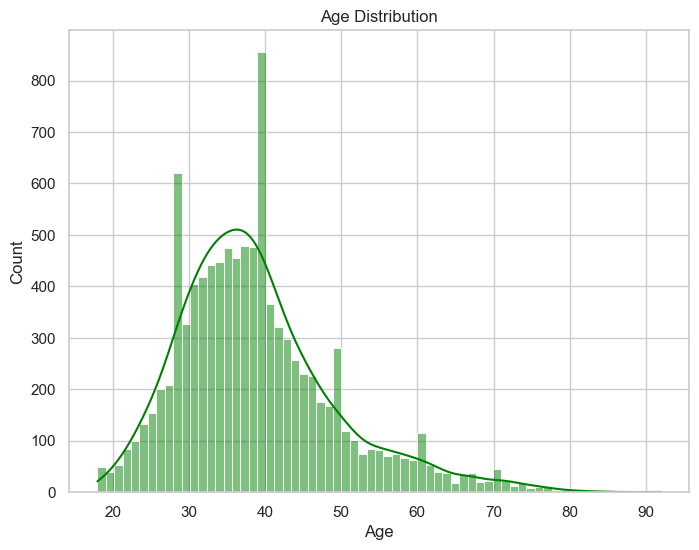

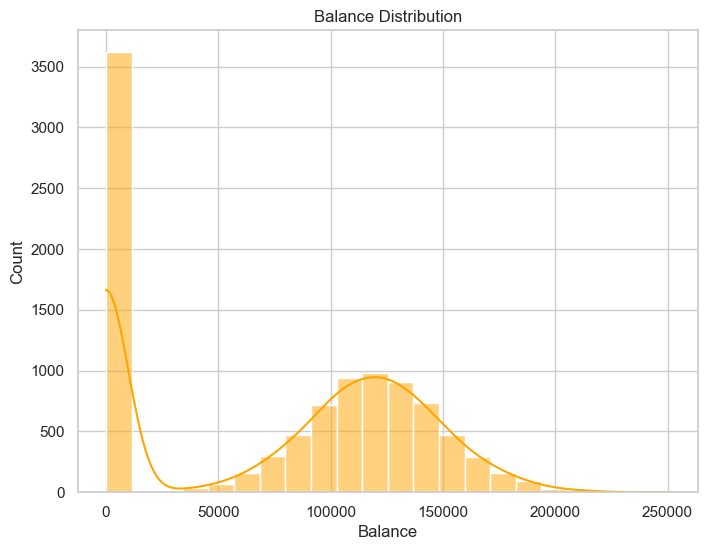

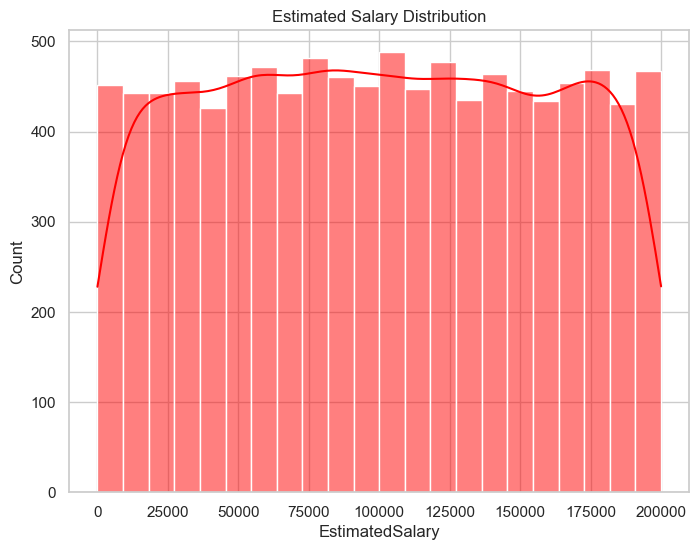

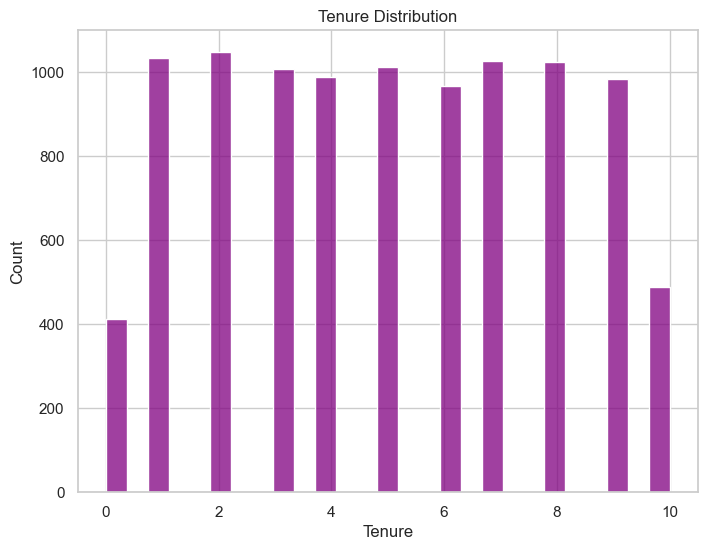

In [6]:
# Exploratory data Analysis
# plotting the distributions of the numerical variables

# Set the figure style
sns.set(style="whitegrid")

# Plot distribution of 'CreditScore'
plt.figure(figsize=(8, 6))
sns.histplot(df['CreditScore'], kde=True, color='blue').set_title('Credit Score Distribution')
plt.show()

# Plot distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='green').set_title('Age Distribution')
plt.show()

# Plot distribution of 'Balance'
plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], kde=True, color='orange').set_title('Balance Distribution')
plt.show()

# Plot distribution of 'EstimatedSalary'
plt.figure(figsize=(8, 6))
sns.histplot(df['EstimatedSalary'], kde=True, color='red').set_title('Estimated Salary Distribution')
plt.show()

# Plot distribution of 'Tenure'
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=False, color='purple').set_title('Tenure Distribution')
plt.show()

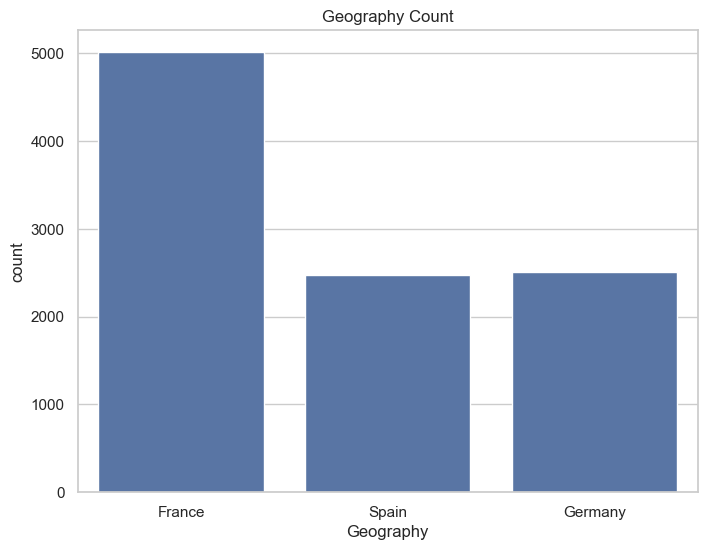

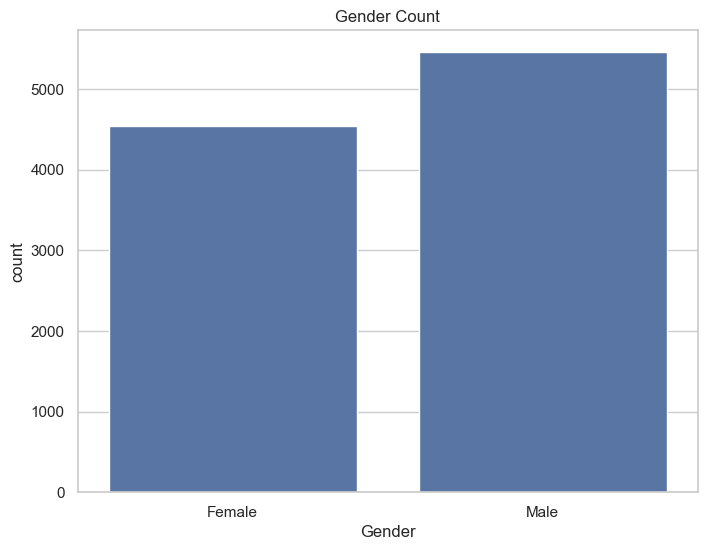

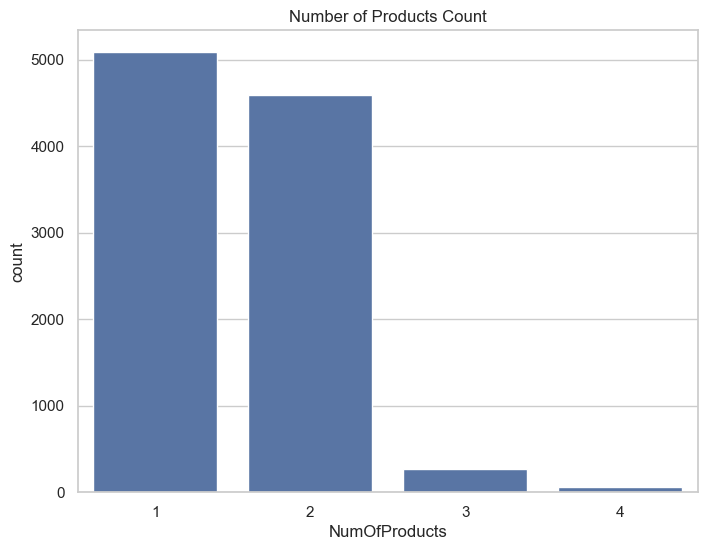

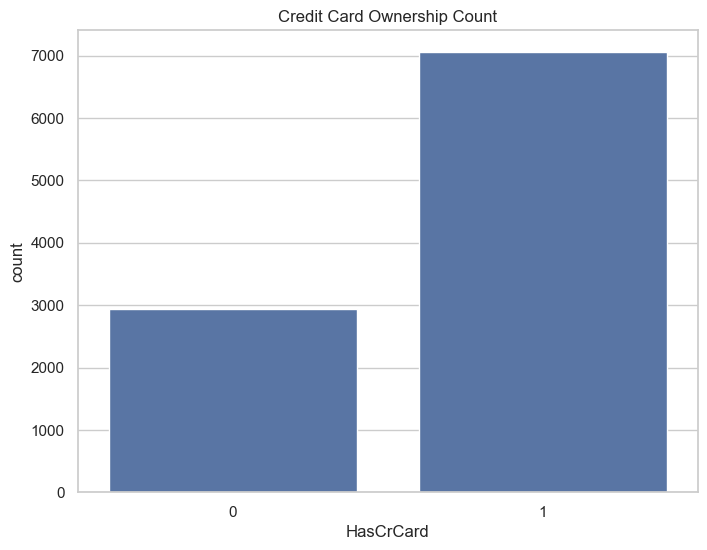

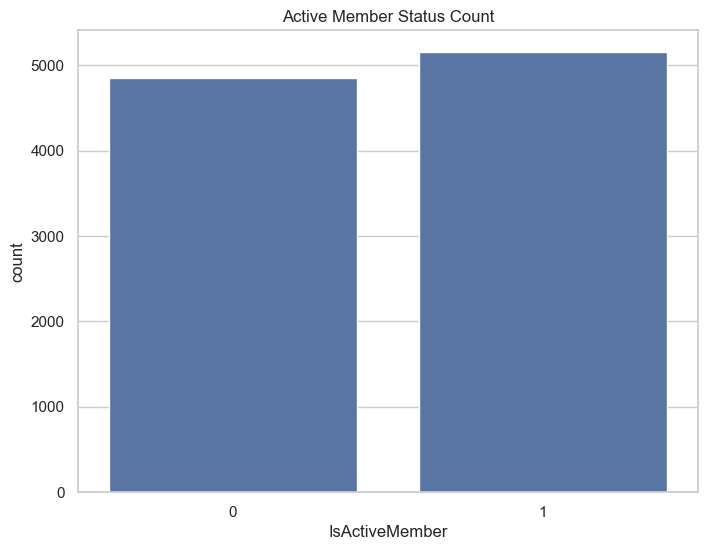

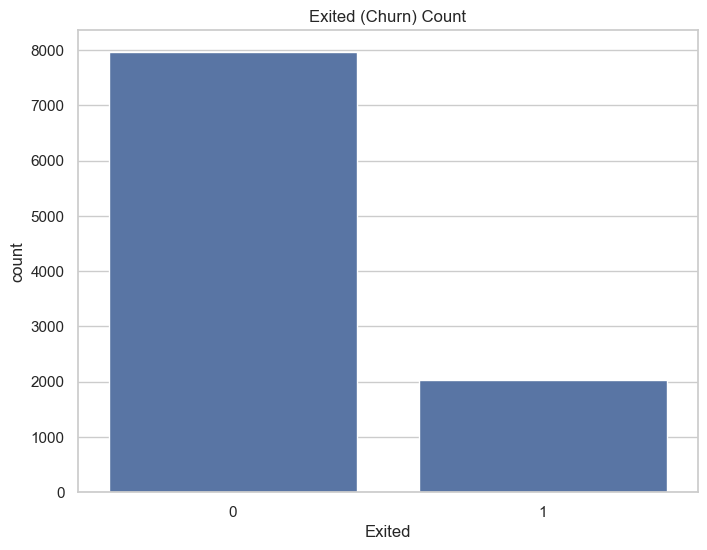

In [7]:
# Plot countplot for 'Geography'
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=df).set_title('Geography Count')
plt.show()

# Plot countplot for 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df).set_title('Gender Count')
plt.show()

# Plot countplot for 'NumOfProducts'
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', data=df).set_title('Number of Products Count')
plt.show()

# Plot countplot for 'HasCrCard'
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', data=df).set_title('Credit Card Ownership Count')
plt.show()

# Plot countplot for 'IsActiveMember'
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', data=df).set_title('Active Member Status Count')
plt.show()

# Plot countplot for 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df).set_title('Exited (Churn) Count')
plt.show()

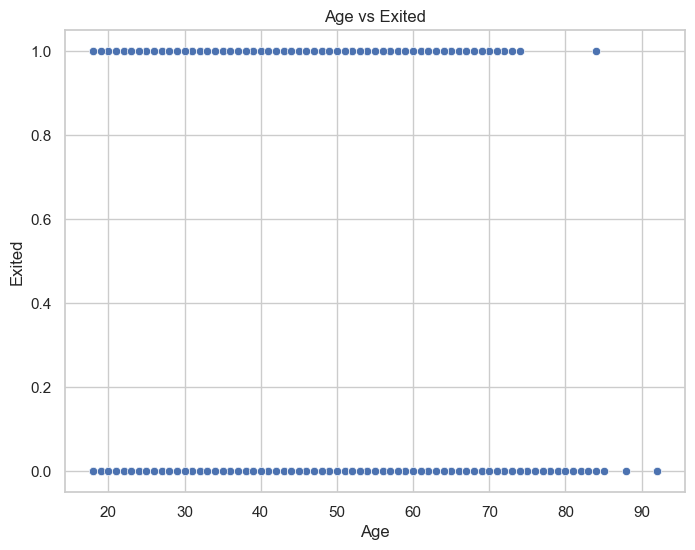

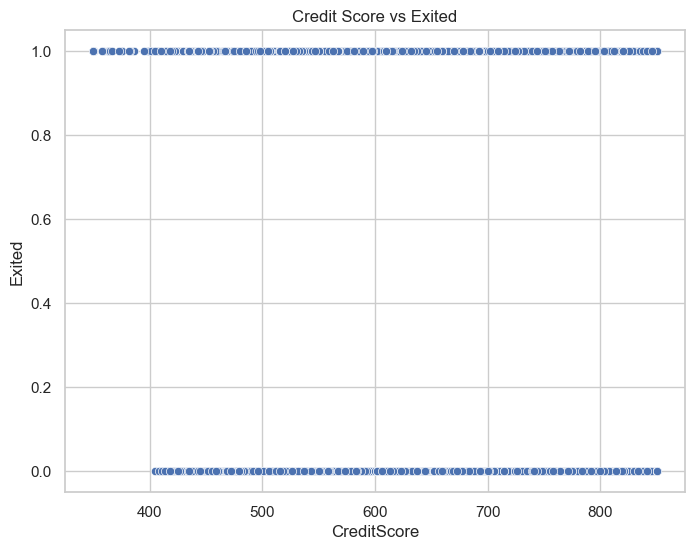

In [8]:
# Plotting Bivariate Relationships Separately (Age & Credit Score vs Exited)

# Scatterplot for Age vs Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Exited', data=df).set_title('Age vs Exited')
plt.show()

# Scatterplot for Credit Score vs Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='Exited', data=df).set_title('Credit Score vs Exited')
plt.show()

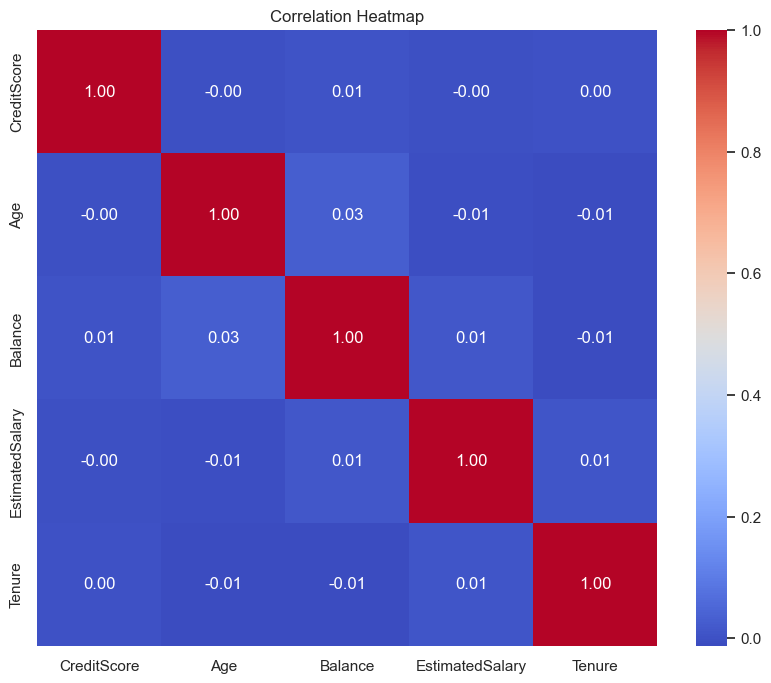

In [9]:
# Correlation Heatmap for numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f").set_title('Correlation Heatmap')
plt.show()

In [10]:
# Encoding 'Geography' and 'Gender' columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [11]:
# Separating features from the target variable
X = df.drop(['CustomerId', 'Surname', 'Exited'], axis = 1). values
y = df['Exited']

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.fit_transform(X_test1)

### Logistic regression

In [13]:
# Training the models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluating model performance
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8132
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2003
           1       0.60      0.18      0.28       497

    accuracy                           0.81      2500
   macro avg       0.71      0.57      0.58      2500
weighted avg       0.78      0.81      0.77      2500

Confusion Matrix: 
[[1944   59]
 [ 408   89]]


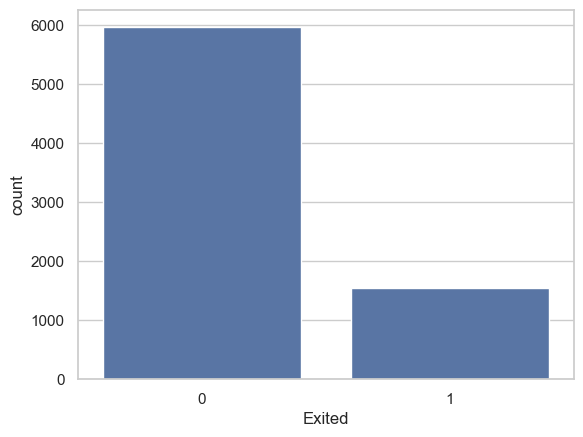

In [14]:
# Checking the balance of our target variable

sns.countplot(x = y_train)
plt.show()

Our target variable seems imbalance. Let's balance it to avoid training a bias model towards the majority class which will lead to poor predictive performance for the minority class.

<Axes: xlabel='Exited', ylabel='count'>

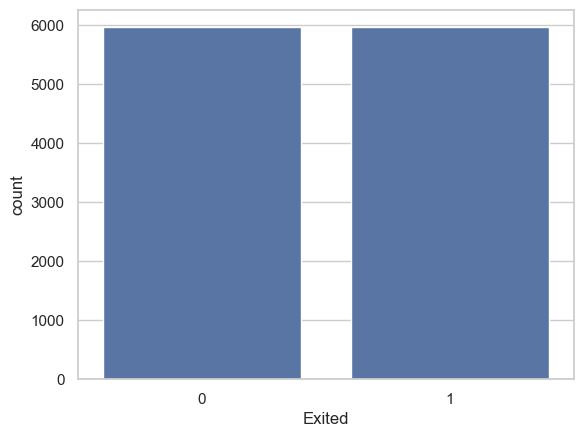

In [15]:
# Balanncing our target variable using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sp, y_train_sp = smote.fit_resample(X_train, y_train)

# Checking distribution after resampling
sns.countplot(x = y_train_sp)

In [16]:
# Training our models
# logistic regression

lr_model = LogisticRegression()
lr_model.fit(X_train_sp, y_train_sp)
y_pred = lr_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7072
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2003
           1       0.37      0.67      0.48       497

    accuracy                           0.71      2500
   macro avg       0.63      0.69      0.64      2500
weighted avg       0.79      0.71      0.73      2500

Confusion Matrix:
[[1434  569]
 [ 163  334]]


### SVM

In [17]:
# support vector machine classifier

svm_model = SVC(probability=True)
svm_model.fit(X_train_sp, y_train_sp)
y_predict = svm_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:")
print(classification_report(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

Accuracy: 0.7936
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2003
           1       0.49      0.74      0.59       497

    accuracy                           0.79      2500
   macro avg       0.71      0.77      0.73      2500
weighted avg       0.84      0.79      0.81      2500

Confusion Matrix:
[[1615  388]
 [ 128  369]]


### KNN

In [18]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train_sp, y_train_sp)
y_pred_knn = knn_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7384
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2003
           1       0.40      0.67      0.50       497

    accuracy                           0.74      2500
   macro avg       0.65      0.71      0.66      2500
weighted avg       0.80      0.74      0.76      2500

Confusion Matrix:
[[1514  489]
 [ 165  332]]


## Ensemble Learning

### Random Forest Classifier

**Note:** Implementation of **bagging** using **RandomForestClassifier**, which is an ensemble method that trains multiple Decision Trees on different random subsets of data and combines their predictions for improved accuracy and stability.

In [19]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=42)
rf_model.fit(X_train1, y_train)
y_pred_Rfc = rf_model.predict(X_test1)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_Rfc))
print("Classification Report:")
print(classification_report(y_test, y_pred_Rfc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_Rfc))

Accuracy: 0.8664
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500

Confusion Matrix:
[[1939   64]
 [ 270  227]]


### Hyperparameter tuning using gridsearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'f1', 'roc_auc', etc., for imbalanced datasets
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train1, y_train)
best_params = grid_search.best_params_


# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8602666666666666


In [21]:
# Retraining the model with the best hyperparameters
best_params = grid_search.best_params_

final_model_rf = RandomForestClassifier(**best_params, random_state=42)
final_model_rf.fit(X_train1, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [22]:
# Make predictions on the test set
y_pred = final_model_rf.predict(X_test1)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.872
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.81      0.46      0.59       497

    accuracy                           0.87      2500
   macro avg       0.85      0.72      0.76      2500
weighted avg       0.87      0.87      0.86      2500

Confusion Matrix:
[[1949   54]
 [ 266  231]]


Cross-Validation Results: {'fit_time': array([2.6526165 , 2.75728869, 3.11401916, 2.34857774, 1.6029613 ]), 'score_time': array([0.13379836, 0.1156621 , 0.16675782, 0.08057308, 0.07842541]), 'test_roc_auc': array([0.84877897, 0.85108909, 0.84910026, 0.8541176 , 0.84406749]), 'test_accuracy': array([0.8575, 0.8685, 0.86  , 0.868 , 0.8585]), 'test_precision': array([0.75518672, 0.79591837, 0.75708502, 0.77821012, 0.76271186]), 'test_recall': array([0.44607843, 0.47794118, 0.45945946, 0.49140049, 0.44226044])}
AUC Score: 0.8561629386905557


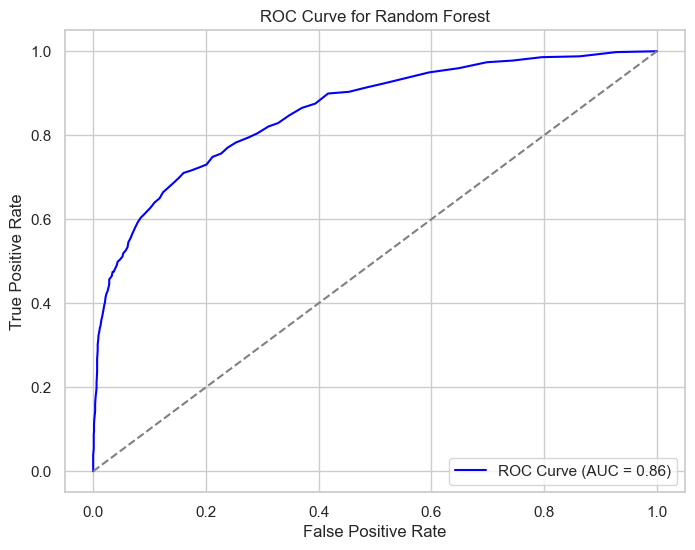

In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve, roc_auc_score

# Step 2: Perform cross-validation
# Use cross_val_score to compute the AUC score for each fold
# cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc")

# Print the cross-validation scores
#print("Cross-Validation AUC Scores:", cv_scores)
#print("Mean AUC Score:", np.mean(cv_scores))

# Alternatively, use cross_validate to compute multiple metrics
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=["roc_auc", "accuracy", "precision", "recall"])
print("Cross-Validation Results:", cv_results)

# Step 3: Fit the model on the full training data
rf_model.fit(X_train1, y_train)

# Step 4: Get predicted probabilities for the positive class (class 1)
y_prob_rf = rf_model.predict_proba(X_test1)[:, 1]

# Step 5: Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)
print("AUC Score:", auc_score)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

### **Summary of the Random Forest Model Performance**  

The Random Forest model achieved a **test accuracy of 87%**, while cross-validation produced an average accuracy of **~86%**. The **ROC-AUC score of 0.86** suggests that the model has good discrimination ability between classes.  

From the classification report:  
- **Precision is relatively high**, meaning the model is good at correctly identifying positive cases.  
- **Recall varies**, indicating that while the model performs well overall, it may miss some positive instances.  
- **Cross-validation results are consistent with the final model's accuracy**, which suggests the model is generalizing well and is not overfitting.  

### **Conclusion:**  
The model demonstrates **strong performance and generalizability**, with a balance between precision and recall. The slight difference between cross-validation accuracy and final accuracy confirms the model’s stability. Further improvements could focus on **handling class imbalance, feature selection, or fine-tuning hyperparameters** to optimize recall and precision further.

### XGBoost 

This shows **Boosting** using **XGBoost (Extreme Gradient Boosting)**. XGBoost is an ensemble learning technique that builds multiple weak learners (decision trees) sequentially, where each tree corrects the errors of the previous one. This iterative process helps improve predictive accuracy and reduce bias. The `XGBClassifier` in the code applies this boosting approach to classify the data.

In [24]:
# XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=20, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train1, y_train)
y_pred_xgb = xgb_model.predict(X_test1)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.8628
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.73      0.49      0.59       497

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500

Confusion Matrix:
[[1914   89]
 [ 254  243]]


# Hyperparameter Tuning

#### For RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 1.0),
    'colsample_bytree': uniform(0.6, 1.0)
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,       # Fewer folds for faster computation
    n_jobs=-1   # Use all CPU cores
)
random_search.fit(X_train1, y_train)

# Best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Accuracy:", random_search.best_score_)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002B3E4698500>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B3D5B68CB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B3D67A6300>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002B3E4698C20>},
                   scoring='accuracy')

In [26]:
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'colsample_bytree': 0.6345442437726183, 'learning_rate': 0.04716797689332718, 'max_depth': 5, 'n_estimators': 83, 'subsample': 0.7447219372165668}
Best Accuracy: 0.8607999999999999


#### For GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1],  # Fewer values
    'n_estimators': [50, 100],     # Smaller range
    'max_depth': [3, 5],           # Fewer values
    'subsample': [0.8, 1.0],       # Fewer values
    'colsample_bytree': [0.8, 1.0] # Fewer values
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=param_grid,
    scoring='accuracy',  # Use 'roc_auc' for imbalanced datasets
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all available CPU cores
)

grid_search.fit(X_train1, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 0.8602666666666666


#### Retraining the model with the best parameters

In [28]:
# Using GridSearch' best parameters
# Getting the best parameters
best_paramsG = grid_search.best_params_

# Retrain the model with the best parameters
final_model = XGBClassifier(**best_paramsG, use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train1, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
# Making predictions on the test set
y_pred = final_model.predict(X_test1)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8648
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.46      0.58       497

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500

Confusion Matrix:
[[1933   70]
 [ 268  229]]


AUC Score: 0.8633498444486187


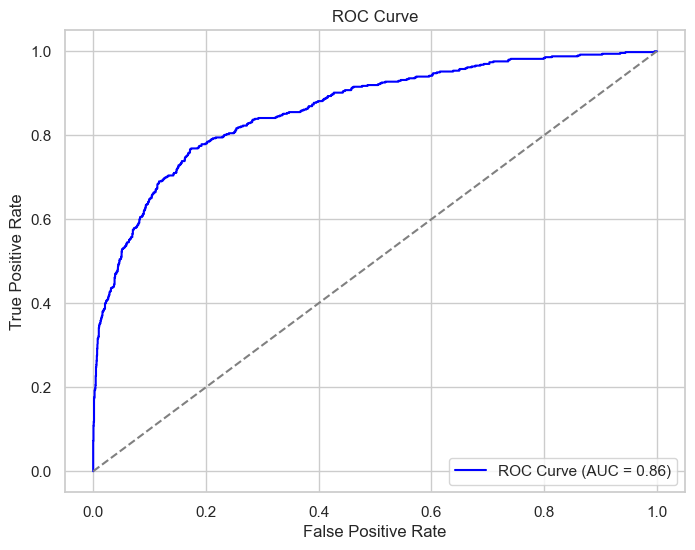

In [30]:
# cross validation XGBoost
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_prob_xgb = xgb_model.predict_proba(X_test1)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_xgb)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **Summary of the XGBoost Model Performance**  

The **XGBoost model achieved a test accuracy of 86.48%**, while its **cross-validation AUC score is 0.86**, indicating strong generalization ability.  

From the classification report:  
- **Class 0 (Majority class) is well-predicted**, with a high precision (0.88) and recall (0.97).  
- **Class 1 (Minority class) has lower recall (0.46)**, meaning the model struggles to correctly identify all positive cases. However, precision (0.77) is decent, leading to an **F1-score of 0.58**.  
- The confusion matrix shows **229 correctly predicted positives** but **268 false negatives**, reinforcing the recall issue.  

### **Conclusion:**  
The model **performs well overall**, with a **balanced trade-off between precision and recall**. However, the **lower recall for Class 1 suggests it may miss some positive cases**, which might be critical depending on the problem domain. The **cross-validation AUC of 0.86 aligns well with the test accuracy**, confirming that the model is **not overfitting and generalizes effectively**.  

To improve performance, **handling class imbalance (SMOTE, class weighting) or further hyperparameter tuning** could help increase recall for the minority class.

## Feature Importance

### For Random Forest

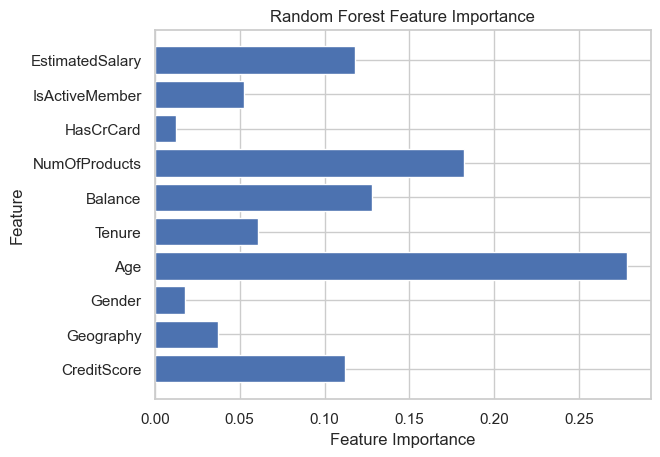

In [31]:
features_names = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] 

importances = final_model_rf.feature_importances_
X_train_df = pd.DataFrame(X_train1, columns = features_names)



# Plot feature importances
plt.barh(features_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

### **Interpretation of the Plot:**
- **Most Important Features:**
  - **Age** has the highest importance, suggesting older customers may have different churn behaviors.
  - **NumOfProducts** and **Balance** are also significant factors, meaning a customer’s account balance and the number of products they use strongly influence churn.
  
- **Moderate Importance:**
  - **CreditScore, Geography, and EstimatedSalary** contribute to the prediction but are less critical than the top features.
  - **Tenure** has a noticeable influence, meaning how long a customer has been with the bank affects churn.

- **Least Important Features:**
  - **IsActiveMember and HasCrCard** have relatively lower importance, indicating that these factors have a smaller impact on predicting churn.

### **Takeaway:**
The bank should focus on customers' **age, balance, and number of products used** when designing retention strategies. Features like **credit score, geography, and tenure** also play a role but with lesser influence.



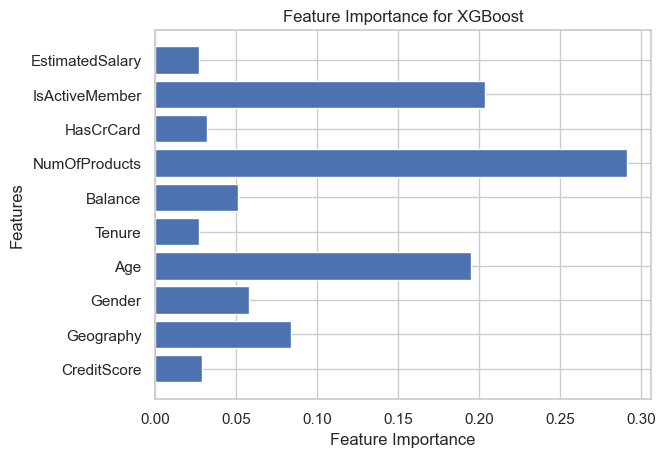

In [32]:
feature_names = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] 

importances = final_model.feature_importances_
X_train_df = pd.DataFrame(X_train1, columns = feature_names)

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for XGBoost")
plt.show()

### **Interpretation of the Plot (XGBoost Feature Importance)**  

#### **Most Important Features:**  
- **NumOfProducts** is the most influential factor, meaning the number of products a customer holds strongly affects churn.  
- **Age** is highly important, suggesting older customers may have different churn behaviors.  
- **Balance** plays a key role—customers with lower or zero balances may be more likely to leave.  

#### **Moderate Importance:**  
- **IsActiveMember** and **Geography** contribute to churn prediction but are not as critical as the top features.  
- **EstimatedSalary** and **Tenure** have a noticeable impact, meaning a customer’s income and time with the bank affect churn to some extent.  

#### **Least Important Features:**  
- **HasCrCard** and **CreditScore** have relatively low importance, indicating they don’t strongly influence churn.  

### **Takeaway:**  
The bank should focus on **NumOfProducts, Age, and Balance** when designing customer retention strategies. Other factors like **activity status, region, and tenure** matter but to a lesser degree.

#### Saving the model

In [34]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

print("Model saved to 'model.pkl'")

Model saved to 'model.pkl'


#### Saving the label encoder

#### This allows us to reuse it for consistent encodeing of categorical varables

In [52]:
from sklearn.preprocessing import LabelEncoder

# Example for gender
gender_encoder = LabelEncoder()
df['Gender_encoded'] = gender_encoder.fit_transform(df['Gender'])
gender_encoder.fit(["Male", "Female"])
# Example for geography
geography_encoder = LabelEncoder()
df['Geography_encoded'] = geography_encoder.fit_transform(df['Geography'])

# Save the encoders
with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)

with open('geography_encoder.pkl', 'wb') as f:
    pickle.dump(geography_encoder, f)